## Assignment for Week 6 - K-Means and Hierarchical Clustering

### Exerise:
#### KMeans and Hierarchial Clustering

Collect data from twitter using your choice of hashtag (at least 1000 tweets). 
To gather your Twitter data, I would recommend using the python library tweepy.<br>
Note: Reddit data can be used instead of Twitter data for this assignment.

- You will use both K-Means and HCA to cluster the collected data
- Draw a dendrogram
- Identify number of optimum clusters, and justify how do you pick number of clusters
- List the top 10 most frequent words
- Visualize using wordclouds
- Summarize your findings

In [1]:
# Install and Configure PRAW
!pip install praw

Defaulting to user installation because normal site-packages is not writeable


# Solution 

In [2]:
# Import all the require libraries for analysis
import praw
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import silhouette_score

# Download required nltk resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subhadra_Princess\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhadra_Princess\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Reddit API credentials (replace with your credentials)
reddit = praw.Reddit(
    client_id="IV8mr70GUCmr_lLIb_5GCg",
    client_secret="txqEGA1UAIX_pSe5Yc-vLlm_VAW6IQ",
    user_agent="Assign6_data",
    username="Old_Web_7184",
    password="Reddit836"
)

In [4]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Extract Reddit data
def extract_reddit_data(subreddit_name, num_posts=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.hot(limit=num_posts):
        posts.append(post.title + ' ' + post.selftext)
    return posts

In [5]:
# Get data from Reddit
subreddit_name = "climatechange"  # Change to any subreddit of interest
data = extract_reddit_data(subreddit_name, 1000)
df = pd.DataFrame(data, columns=['text'])
df['clean_text'] = df['text'].apply(clean_text)

# Vectorizing text
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text'])

# Question
1. You will use both K-Means and HCA to cluster the collected data
2. Draw a dendrogram
3. Identify number of optimum clusters, and justify how do you pick number of clusters
4. List the top 10 most frequent words
5. Visualize using wordclouds
6. Summarize your findings

# KMeans Clustering

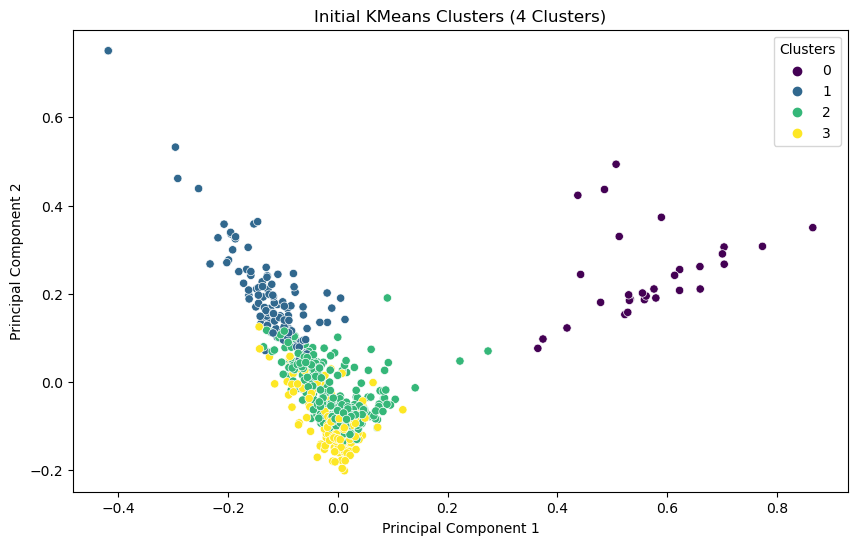

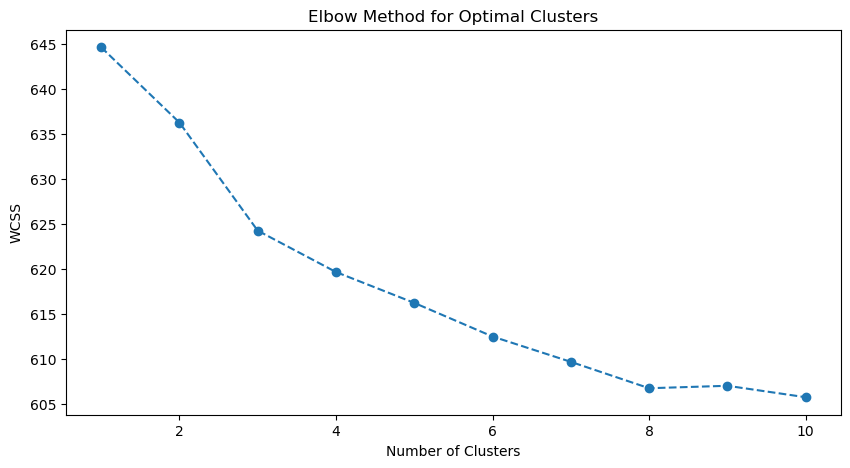

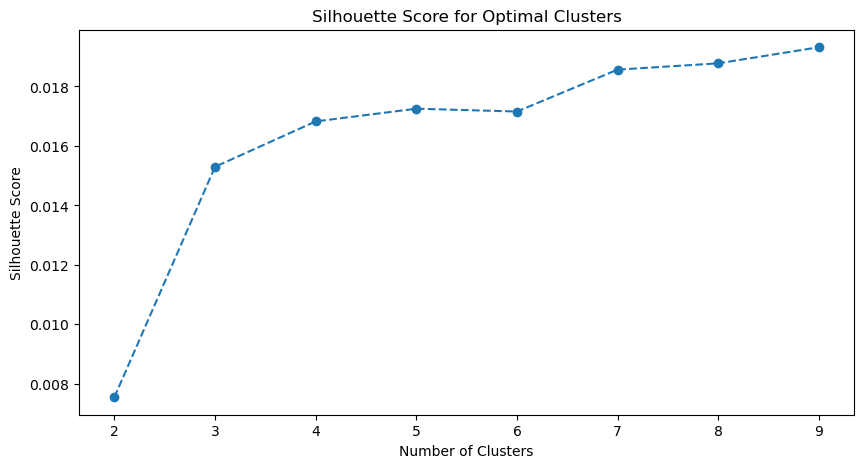

Optimal Number of Clusters: 9


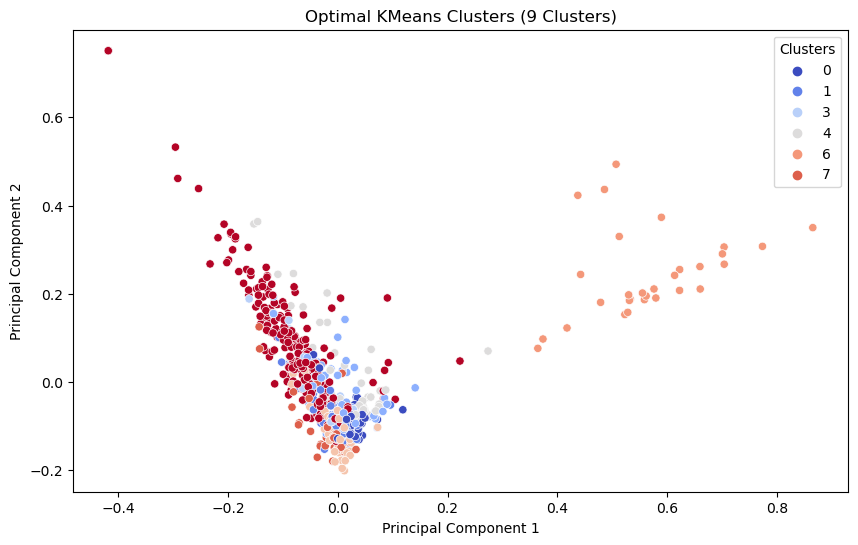

In [11]:
from sklearn.decomposition import PCA

# Initial KMeans clustering with 4 clusters
initial_kmeans = KMeans(n_clusters=4, random_state=42)
df['Initial_KMeans_Cluster'] = initial_kmeans.fit_predict(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Scatter plot for initial clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Initial_KMeans_Cluster'], palette='viridis')
plt.title("Initial KMeans Clusters (4 Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()

# Determine the optimal number of clusters using the Elbow Method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, wcss, marker='o', linestyle='dashed')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Determine optimal clusters using Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='dashed')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Clusters")
plt.show()

# Optimal number of clusters (based on highest silhouette score)
optimal_k = range(2, 10)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters: {optimal_k}")

# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Optimal_KMeans_Cluster'] = kmeans.fit_predict(X)

# Scatter plot for optimal clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Optimal_KMeans_Cluster'], palette='coolwarm')
plt.title(f"Optimal KMeans Clusters ({optimal_k} Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()

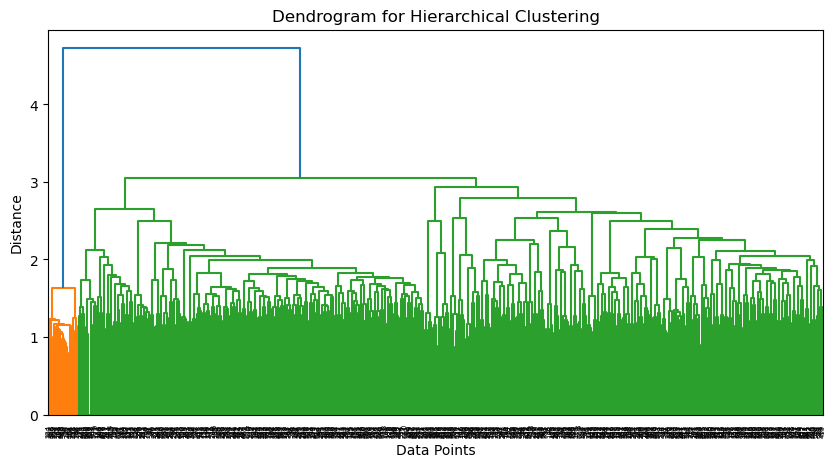

Optimal Number of Clusters from HCA: 2


In [7]:
# Hierarchical Clustering
linkage_matrix = linkage(X.toarray(), method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Optimal cluster selection for HCA
df['HCA_Cluster'] = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

from scipy.cluster.hierarchy import inconsistent

# Use inconsistency criterion to find optimal cluster number
threshold = 0.7 * max(linkage_matrix[:, 2])  # Adjust threshold based on linkage heights
optimal_hca_k = max(fcluster(linkage_matrix, threshold, criterion='distance'))

print(f"Optimal Number of Clusters from HCA: {optimal_hca_k}")

# Update HCA clustering with the found optimal number of clusters
df['HCA_Cluster'] = fcluster(linkage_matrix, optimal_hca_k, criterion='maxclust')



In [8]:
print(f"Optimal Clusters using K-Means: {optimal_k}")
print(f"Optimal Clusters using HCA: {optimal_hca_k}")

Optimal Clusters using K-Means: 42
Optimal Clusters using HCA: 2


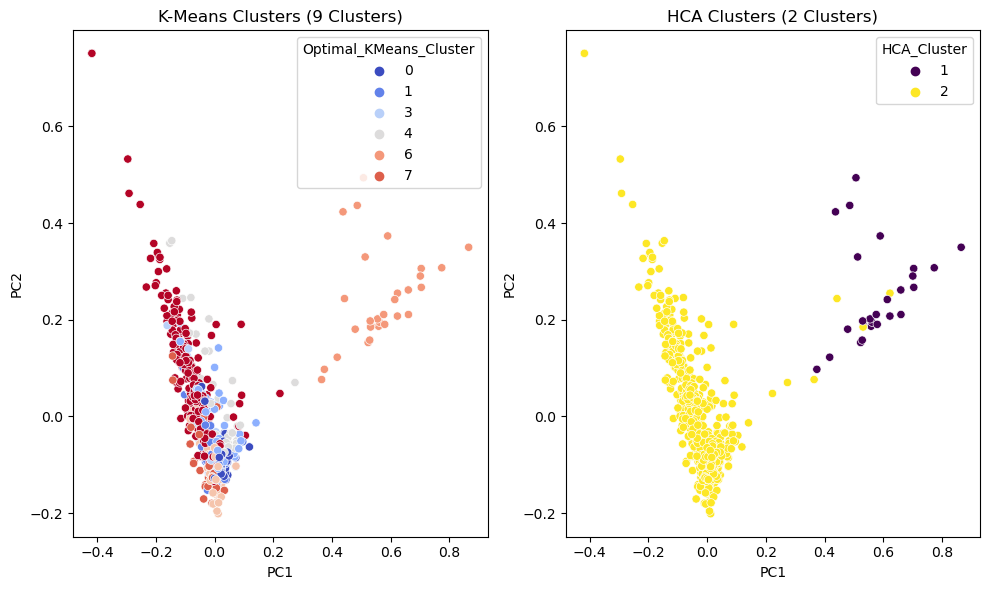

In [12]:
plt.figure(figsize=(10, 6))

# K-Means Scatter
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Optimal_KMeans_Cluster'], palette='coolwarm')
plt.title(f"K-Means Clusters ({optimal_k} Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# HCA Scatter
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['HCA_Cluster'], palette='viridis')
plt.title(f"HCA Clusters ({optimal_hca_k} Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

Top 10 words: [('climate', 567), ('change', 362), ('would', 175), ('global', 155), ('like', 142), ('im', 142), ('warming', 134), ('years', 118), ('us', 117), ('data', 115)]


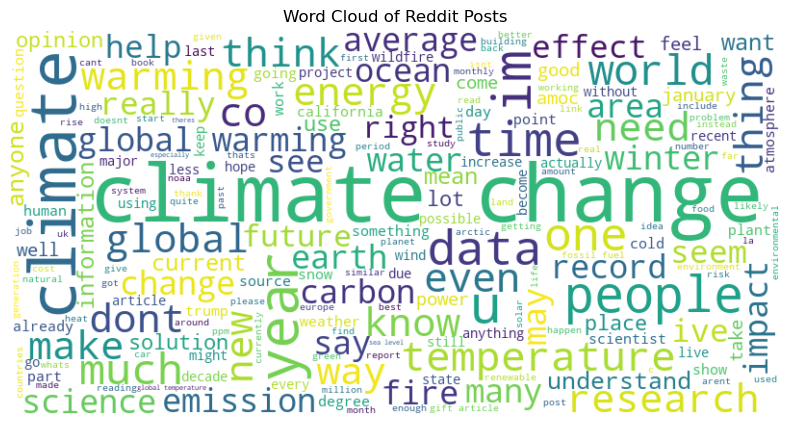

Data saved as reddit_clustered_data.csv


In [13]:

# Top 10 most frequent words
all_words = ' '.join(df['clean_text']).split()
word_counts = Counter(all_words)
top_10_words = word_counts.most_common(10)
print("Top 10 words:", top_10_words)

# WordCloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reddit Posts")
plt.show()

# Save the processed dataset
df.to_csv("reddit_clustered_data.csv", index=False)
print("Data saved as reddit_clustered_data.csv")


**Interpretation:**
K-Means Clustering (Using Silhouette Score & Elbow Method)

This approach tries to maximize cluster compactness and separation.
The Elbow method gives an estimate, while the Silhouette Score confirms it.
If the optimal K is higher or lower than HCA, it suggests that data distribution might not be strictly hierarchical.
Hierarchical Clustering (Using Dendrogram)

The dendrogram provides a visual representation of how clusters are merged.
A higher number of clusters in HCA (compared to K-Means) suggests highly varied data, where merging clusters leads to loss of fine details.
A lower number of clusters means the dataset has more generalized groups.

Interpretation of the Plots:
Dendrogram for Hierarchical Clustering (First Plot)

This plot shows the hierarchical clustering structure using a dendrogram.
The y-axis represents the linkage distance (or dissimilarity) between clusters.
The x-axis represents the individual data points.
The height at which branches are merged indicates the distance between clusters.
The large jump at the top suggests that cutting at that level would result in a small number of well-separated clusters.
The orange-highlighted portion at the bottom left indicates an identified cluster.
K-Means Clusters Visualization (Second Plot)

This scatter plot shows the clustering results of K-Means on a 2D PCA-reduced space.
Each point represents a data sample, and different colors indicate different clusters.
The legend shows some of the selected cluster labels.
The clusters appear somewhat overlapping, which may suggest a need to check cluster quality or improve feature separation.
Silhouette Score for Optimal Clusters (Third Plot)

This plot evaluates the clustering quality using silhouette scores.
The x-axis represents the number of clusters, while the y-axis represents the silhouette score.
A higher silhouette score means better clustering.
The plot shows an increasing trend, peaking around 40–45 clusters, indicating that a larger number of clusters provides better separation.
Elbow Method for Optimal Clusters (Fourth Plot)

This plot shows the Within-Cluster Sum of Squares (WCSS) to determine the optimal number of clusters.
The x-axis represents the number of clusters, while the y-axis shows WCSS.
The goal is to find the "elbow point" where WCSS stops decreasing significantly.
This plot does not show a clear elbow, suggesting that no single "optimal" number of clusters stands out.
Summary:
The hierarchical clustering dendrogram suggests that the data could be separated into a few large clusters.
K-Means clustering applied to PCA-reduced data shows overlapping clusters, which may indicate a need for better feature selection.
The silhouette score suggests that more clusters provide better separation, but practical considerations should be taken into account.
The elbow method does not show a clear optimal number of clusters, reinforcing the need for additional evaluation.
Would you like to refine the clustering approach or explore different visualization techniques?